In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Covid_Tweets_data.csv to Covid_Tweets_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Covid_Tweets_data.csv")


In [ ]:
df.drop("sentiment", axis=1, inplace=True)
df.head()

,tweets,category
0,toplam aşı sayısı 9921056 1doz uygulanan kişi ...,doz
1,biontech orta afrika ülkesi ruanda unicef işbi...,biontech
2,aşı 1500 nüfusa aşı merkezi 10 günde aşılanır ...,doz
3,haftanın yalanları utanç size yeterde artar 1-...,sinovac
4,türkiye faz 3 çalışma sonuçları yaklaşık 11000...,covid


In [ ]:
tweets=df


In [ ]:
tweets.tail()

,tweets,category
2395,haftanın yalanları utanç size yeterde artar 1-...,sinovac
2396,sırbistan'a 3 parti sinopharm covid-19 aşıları...,sinovac
2397,pfizer-biontech astrazeneca moderna’nın covid-...,biontech
2398,pfizer-biontech astrazeneca moderna’nın covid-...,biontech
2399,aklımızla alay aşı 45 günde etkili diyorlartop...,covid


In [ ]:
!pip install transformers
!pip install tqdm

!pip install wordcloud
!pip install TurkishStemmer
!pip install sklearn
!pip install nltk

In [ ]:
total_tweets = len(tweets)
print(f"Toplam {total_tweets} adet tweet bulunuyor.")


Toplam 2400 adet tweet bulunuyor.


In [ ]:
tweet_counts = tweets['category'].value_counts()
print(tweet_counts)


doz         607
covid       606
sinovac     595
biontech    592
Name: category, dtype: int64


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

sentiment_analysis_pipeline= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
#örnek cümle
sentiment_analysis_pipeline("Çok güzel bir fikir olduğunu düşünüyorum")

[{'label': 'positive', 'score': 0.9267760515213013}]

In [ ]:
import pandas as pd
from transformers import pipeline

# Duygusal analiz modelini yükleme
sentiment_classifier = pipeline("sentiment-analysis")

# Veri setindeki her bir veri için duygusal analiz yapma
sentiment_result=[]
for index, row in df.iterrows():
    text = row["tweets"]  # Duygusal analiz yapılacak metin sütununun adı
    result = sentiment_analysis_pipeline(text)[0]
    sentiment_result.append(result)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Sonuçları veri çerçevesine ekleme
tweets["score"] = [result["score"] for result in sentiment_result]
tweets["label"] = [result["label"] for result in sentiment_result]

# Sonuçları görüntüleme
tweets.head()


,tweets,category,score,label
0,toplam aşı sayısı 9921056 1doz uygulanan kişi ...,doz,0.643275,positive
1,biontech orta afrika ülkesi ruanda unicef işbi...,biontech,0.630096,positive
2,aşı 1500 nüfusa aşı merkezi 10 günde aşılanır ...,doz,0.974773,positive
3,haftanın yalanları utanç size yeterde artar 1-...,sinovac,0.992352,negative
4,türkiye faz 3 çalışma sonuçları yaklaşık 11000...,covid,0.984666,negative


In [ ]:
category = "biontech"  # İstediğiniz kategoriyi buraya yazın

category_tweets = tweets[tweets["category"] == category]
total_tweets = len(category_tweets)
positive_tweets = category_tweets[category_tweets["label"] == 'positive']
positive_ratio = len(positive_tweets) / total_tweets

print(f"Positivity Rate of a total of {total_tweets} tweets in the {category} category: {positive_ratio:.2f}")



Positivity Rate of a total of 592 tweets in the biontech category: 0.40


In [ ]:
category = "biontech"  # İstediğiniz kategoriyi buraya yazın

category_tweets = tweets[tweets["category"] == category]
total_tweets = len(category_tweets)
negative_tweets = category_tweets[category_tweets["label"] == 'negative']
negative_ratio = len(negative_tweets) / total_tweets

print(f"Negativity Rate of a total of {total_tweets} tweets in the {category} category: {negative_ratio:.2f}")


Negativity Rate of a total of 592 tweets in the biontech category: 0.60


In [ ]:
import random

negative_tweets = tweets[tweets["label"] == 'negative']
positive_tweets = tweets[tweets["label"] == 'positive']

random_negative_tweets = negative_tweets.sample(5, random_state=42)
random_positive_tweets = positive_tweets.sample(5, random_state=42)

print("Negative Labeled Sentences:")
print(random_negative_tweets["tweets"].values)

print("\nPositive Labeled Sentences:")
print(random_positive_tweets["tweets"].values)


Negative Labeled Sentences:
["haftanın yalanları utanç size yeterde artar 1- kk nın sinovac 1 doz aşı bağışladı pandemi dönemindeyiz ülkeler aşı'ya ulaşmak savaşa girebilir 1 doz aşı ücretsiz verilirmi inanır tabii halk tv izleyen aydınlar"
 'rusya aşı alınsa koruculuğu teymini uygun değilim biontech diğerlerine ulaşamıyorken'
 'aşılama performansımızda ciddi düşüş grafikte mavi sütunlar günlük toplam aşıyı kırmızı çizgi geriye dönük 7 günlük ortalamaları trendi gösteriyor i̇ki hafta önce toplam 27 aşı yaparken hafta 16 doz yapabilmişiz neredeyse yarı yarıya'
 'rusya aşı alınsa koruculuğu teymini uygun değilim biontech diğerlerine ulaşamıyorken'
 'bence devlet pandemi varmis vatandasa doz aşı anlaşması yapildi buda 170milyona tekabul devlet parayi aşı firmalarina odeyecek depoda cureyecegine sekilde halka aşıyı yapacaklaryapmalari icinde salgini surdurmeliler salgınsahteyasaklarkalksın']

Positive Labeled Sentences:
["sinovac abicim sana özel fiyat aman kimseye çaktırma bizimki eyvalla

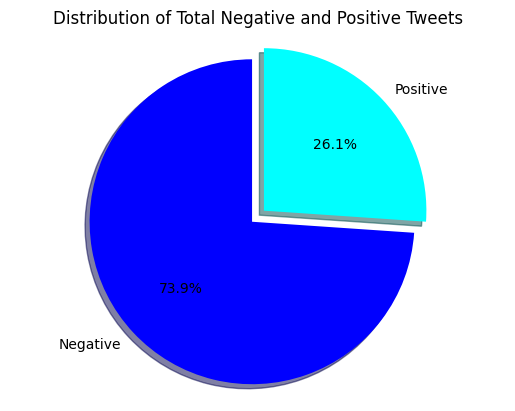

In [ ]:
import matplotlib.pyplot as plt

# Negatif ve pozitif tweetlerin sayısını hesapla
total_tweets = len(tweets)
negative_tweets = tweets[tweets["label"] == 'negative']
positive_tweets = tweets[tweets["label"] == 'positive']
negative_count = len(negative_tweets)
positive_count = len(positive_tweets)

# Pasta grafiği oluşturma
labels = ["Negative", "Positive"]
sizes = [negative_count, positive_count]
colors = ["blue", "cyan"]
explode = (0.1, 0)  # Sadece negatif dilimde biraz ayrışma

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Daire şeklini korumak için
plt.title("Distribution of Total Negative and Positive Tweets")
plt.show()

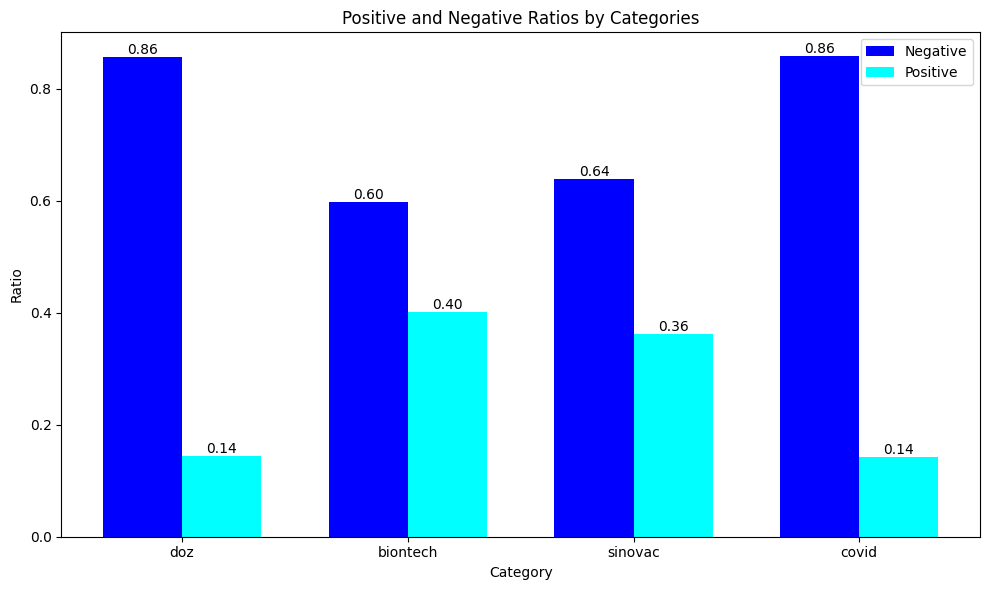

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Kategorilere göre negatif ve pozitif tweet oranlarını hesapla
categories = tweets["category"].unique()
category_count = len(categories)

# Kategori adları, negatif oranlar ve pozitif oranlar için boş listeler oluştur
category_labels = []
negative_ratios = []
positive_ratios = []

for category in categories:
    category_tweets = tweets[tweets["category"] == category]
    total_count = len(category_tweets)
    negative_count = len(category_tweets[category_tweets["label"] == 'negative'])
    positive_count = len(category_tweets[category_tweets["label"] == 'positive'])
    negative_ratio = negative_count / total_count
    positive_ratio = positive_count / total_count

    category_labels.append(category)
    negative_ratios.append(negative_ratio)
    positive_ratios.append(positive_ratio)


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = np.arange(category_count)


ax.bar(bar_positions, negative_ratios, bar_width, label="Negative", color="blue")
ax.bar(bar_positions + bar_width, positive_ratios, bar_width, label="Positive", color="cyan")

ax.set_xlabel("Category")
ax.set_ylabel("Ratio")
ax.set_title("Positive and Negative Ratios by Categories")
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(category_labels)
ax.legend()


for i, (neg_ratio, pos_ratio) in enumerate(zip(negative_ratios, positive_ratios)):
    ax.text(i, neg_ratio, f"{neg_ratio:.2f}", ha="center", va="bottom")
    ax.text(i + bar_width, pos_ratio, f"{pos_ratio:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [ ]:
data = tweets.copy()
data.head()

,tweets,category,score,label
0,toplam aşı sayısı 9921056 1doz uygulanan kişi ...,doz,0.643275,positive
1,biontech orta afrika ülkesi ruanda unicef işbi...,biontech,0.630096,positive
2,aşı 1500 nüfusa aşı merkezi 10 günde aşılanır ...,doz,0.974773,positive
3,haftanın yalanları utanç size yeterde artar 1-...,sinovac,0.992352,negative
4,türkiye faz 3 çalışma sonuçları yaklaşık 11000...,covid,0.984666,negative


In [ ]:
def preProcess(ReviewText):
    #Verideki <br> taglarını kaldır.
    ReviewText = ReviewText.str.lower()
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    #Verideki Linkleri Kaldır.
    ReviewText = ReviewText.str.replace(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', ' ')
    return ReviewText

data['tweets'] = preProcess(data['tweets'])

In [ ]:
# Kök Bulma
stemmer = TurkishStemmer()

stemmed_lists = []
for index in tqdm(data.index):
    mini_l = []
    for text in data.loc[index]['tweets'].split(" "):
        mini_l.append(stemmer.stem(text))

    big_text=" "
    for char in mini_l:
        big_text = big_text + " " + char
    stemmed_lists.append(big_text)

data['stemmed'] = stemmed_lists

100%|██████████| 2400/2400 [00:02<00:00, 854.61it/s]


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

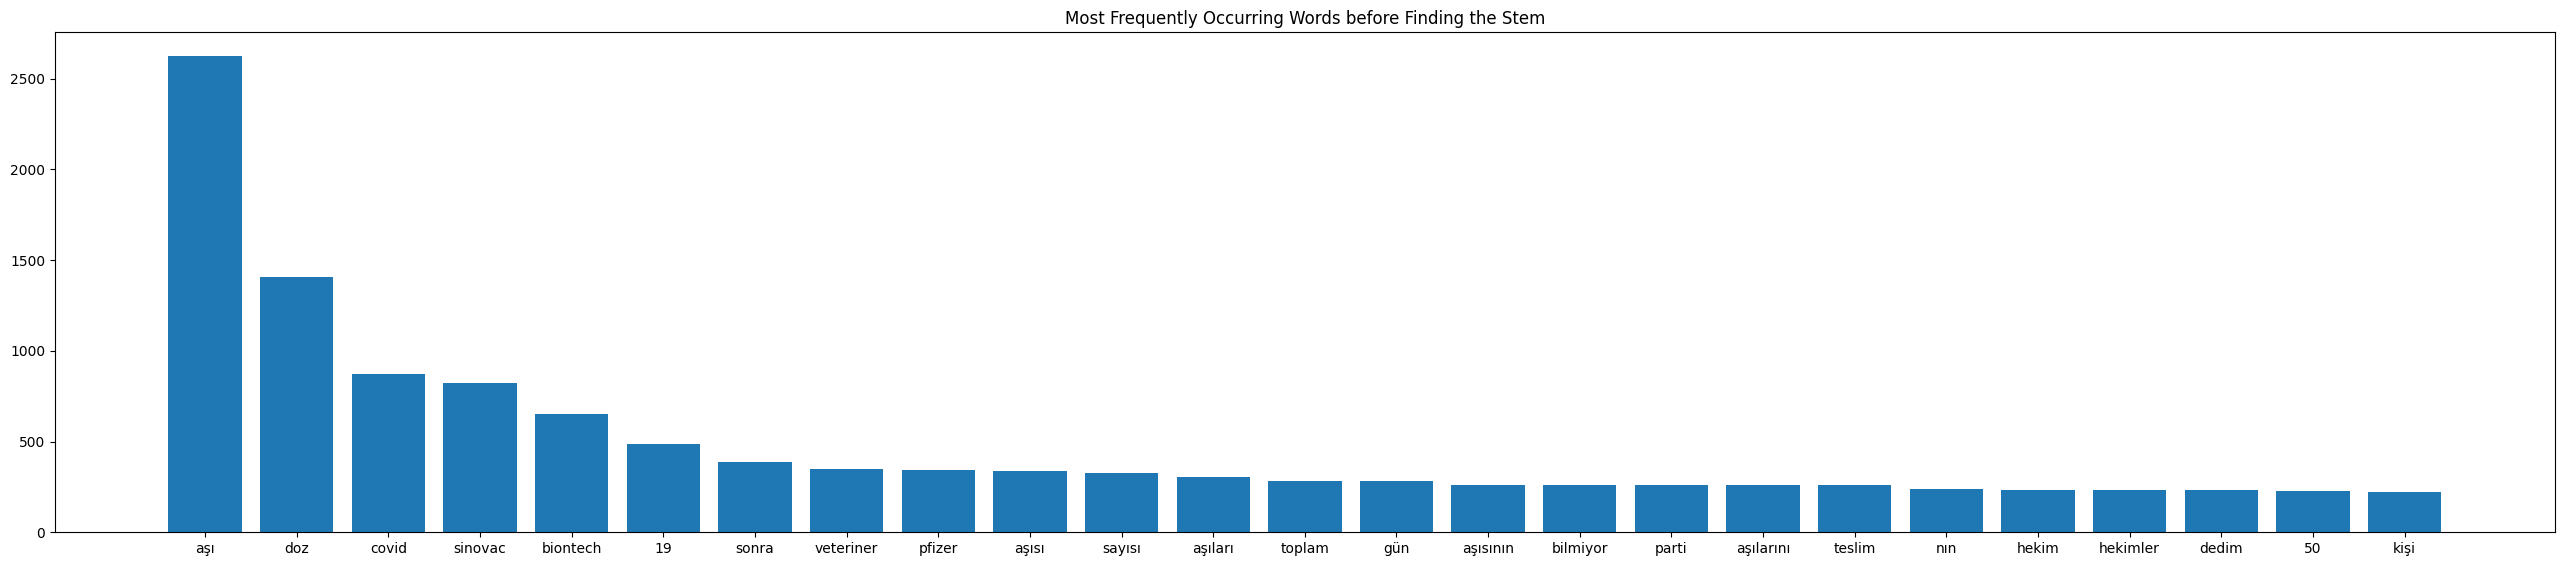

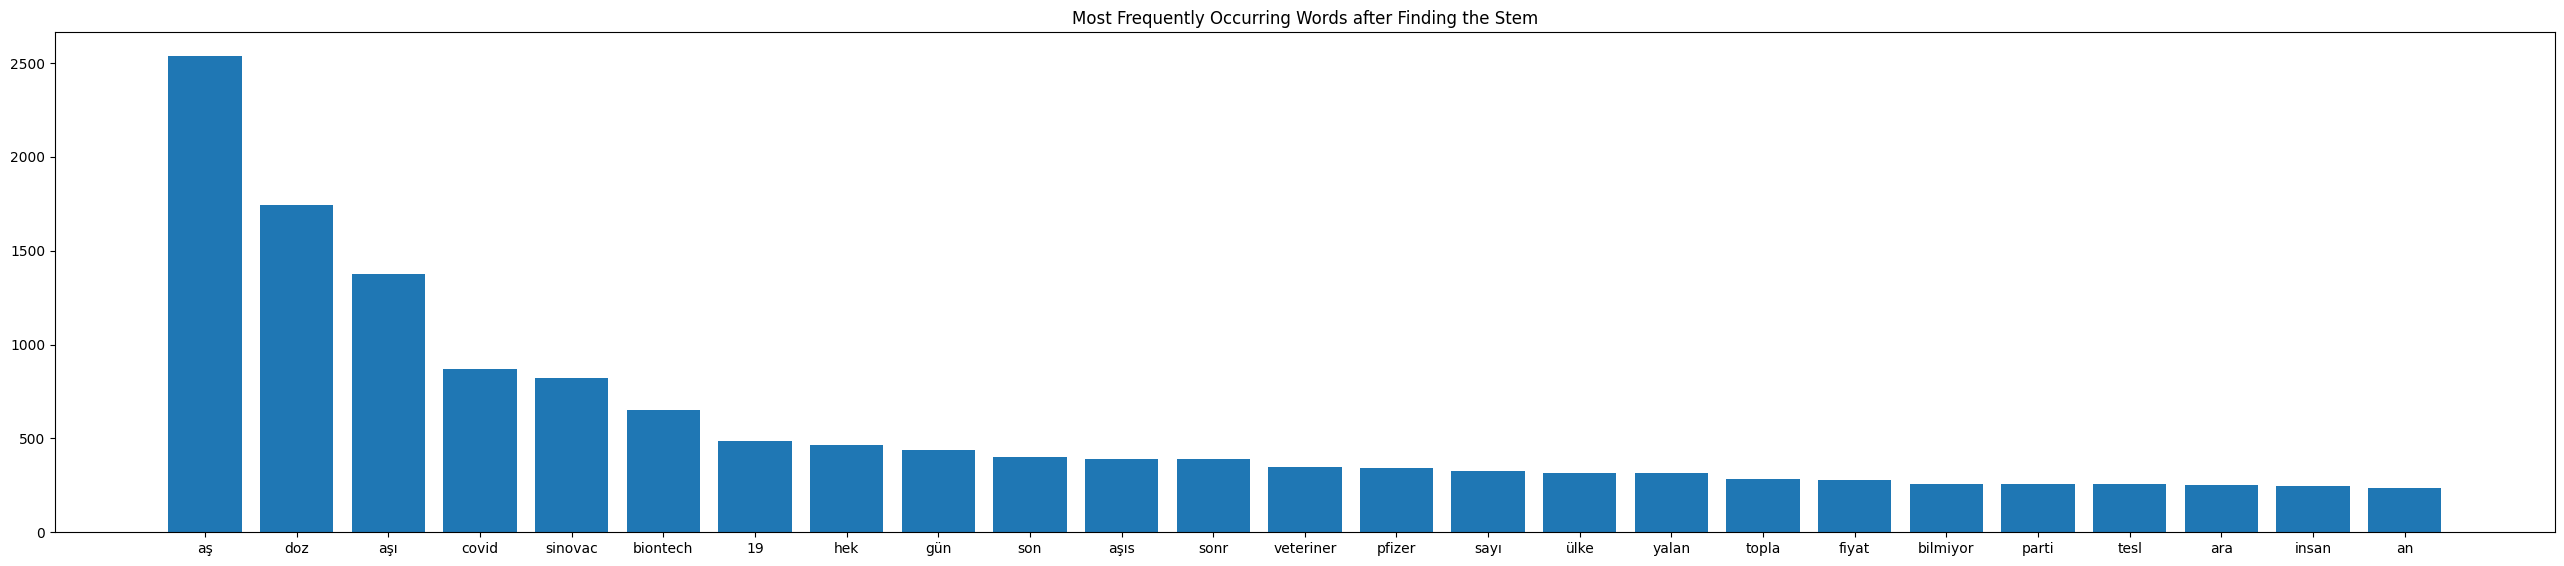

In [ ]:
common_words = get_top_n_words(data['tweets'], 25)
df2 = pd.DataFrame(common_words, columns = ['kelime' , 'geçiş frekansı'])
fig = plt.figure(figsize=[25,5])
ax = fig.add_axes([0,0,1,1])
ax.bar(df2.kelime,df2['geçiş frekansı'])
plt.title('Most Frequently Occurring Words before Finding the Stem')
plt.show()


common_words = get_top_n_words(data['stemmed'], 25)
df2 = pd.DataFrame(common_words, columns = ['kelime' , 'geçiş frekansı'])
fig = plt.figure(figsize=[25,5])
ax = fig.add_axes([0,0,1,1])
ax.bar(df2.kelime,df2['geçiş frekansı'])
plt.title('Most Frequently Occurring Words after Finding the Stem')
plt.show()

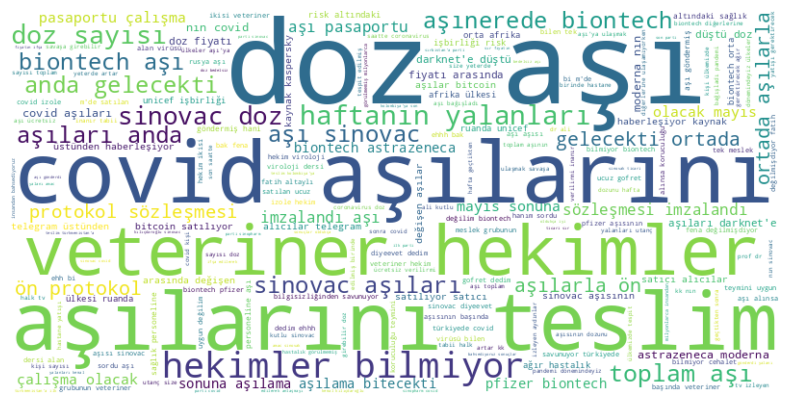

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Metinleri birleştirin
birlesik_metin = " ".join(data["tweets"])

# Wordcloud oluşturun
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(birlesik_metin)

# Wordcloud'u görselleştirin
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

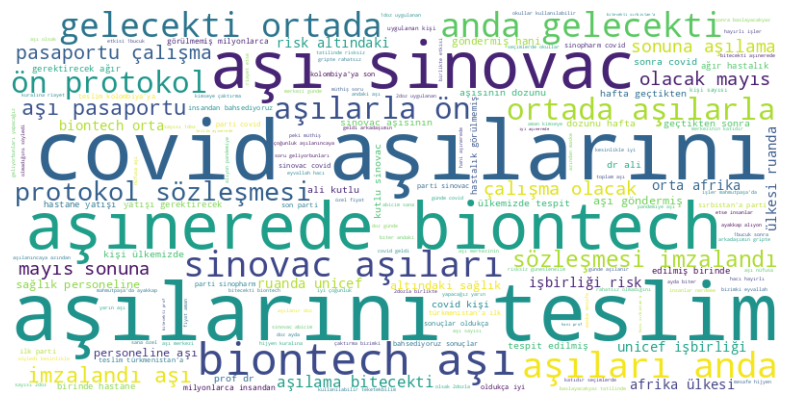

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Pozitif etiketli verileri filtreleyin
positive_tweets = data[data["label"] == 'positive']

# Metinleri birleştirin
birlesik_metin = " ".join(positive_tweets["tweets"])

# Wordcloud oluşturun
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(birlesik_metin)

# Wordcloud'u görselleştirin
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


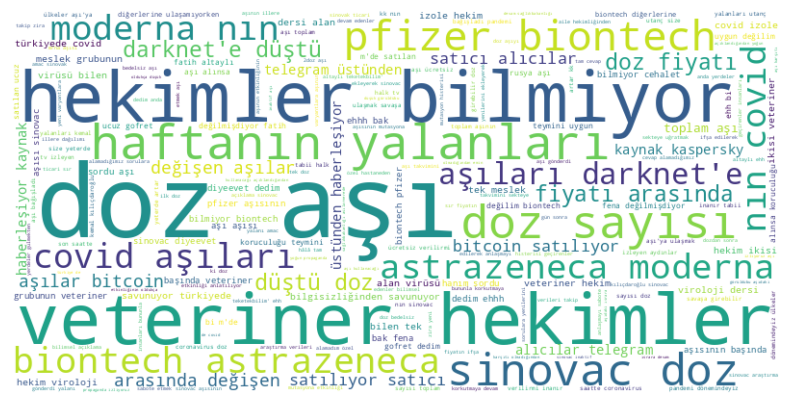

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Negatif etiketli verileri filtreleyin
negative_tweets = data[data["label"] == 'negative']

# Metinleri birleştirin
birlesik_metin = " ".join(negative_tweets["tweets"])

# Wordcloud oluşturun
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(birlesik_metin)

# Wordcloud'u görselleştirin
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
